## Algebraic Connectivity

https://en.wikipedia.org/wiki/Algebraic_connectivity

The algebraic connectivity (also known as Fiedler value or Fiedler eigenvalue) of a graph G is the **second-smallest eigenvalue of the Laplacian matrix of G**

This eigenvalue is greater than 0 if and only if G is a connected graph.

This is a corollary to the fact that the number of times 0 appears as an eigenvalue in the Laplacian is the number of connected components in the graph.

The magnitude of this value reflects how well connected the overall graph is. It has been used in analyzing the robustness and synchronizability of networks. 

In [112]:
import networkx as nx
import numpy as np

In [113]:
G = nx.erdos_renyi_graph(n=15, p=.25, seed=50)

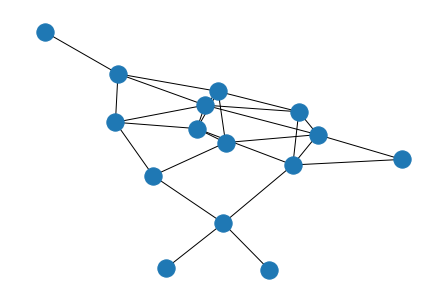

In [114]:
nx.draw(G)

We can measure how **dense** the graph is with the `nx.density(G)` function.

In [115]:
nx.density(G)

0.2571428571428571

And we can view the number of connected components: `nx.number_connected_components(G)`

In [116]:
nx.number_connected_components(G)

1

We can now check the algebraic connectivity by looking at the second smallest eigenvalue of the graph's Laplacian matrix.

In [117]:
L = nx.laplacian_matrix(G).toarray()
evals, evecs = np.linalg.eig(L)
sorted(evals)

[-4.183068750318838e-16,
 0.42348460951660505,
 0.7633831583504219,
 1.0000000000000002,
 1.4690152948434794,
 2.3310367290120806,
 3.084643283074335,
 3.5887825403251212,
 4.317682394195984,
 4.571470870430381,
 5.180406067384013,
 6.040435592646254,
 6.30987267082511,
 7.090382857488868,
 7.829403931907301]

This is also available directly in networkx with the `nx.algebraic_connectivity(G)` method.

In [118]:
nx.algebraic_connectivity(G)

0.4234846095166049

Since the algebraic connectivity is not zero, we know that this is a graph with a single connected component.

The number of connected components in a graph is equal to the number of times zero occurs as an eigenvalues of `L`

In [119]:
# find number of zero eigenvalues
# note: we use np.isclose() to mitigate floating point errors
num_zero_evals = sum(np.isclose(evals, 0))

assert num_zero_evals == nx.number_connected_components(G)

We can view the edges in a graph with the `G.edges` property.

In [120]:
for edge in G.edges:
  print(edge)

(0, 4)
(0, 7)
(0, 10)
(0, 11)
(1, 2)
(2, 3)
(2, 7)
(2, 13)
(4, 5)
(4, 8)
(4, 11)
(4, 12)
(5, 10)
(5, 12)
(5, 13)
(6, 7)
(6, 8)
(6, 11)
(6, 12)
(8, 9)
(8, 12)
(10, 12)
(10, 13)
(10, 14)
(11, 12)
(11, 13)
(13, 14)


Let's disconnect any edges between nodes 1-7 and nodes 8-14.

In [121]:
for node1, node2 in G.edges:
  if node1 < 8 <= node2:
    G.remove_edge(node1, node2)

Now we should have 2 distinct components in the graph.

2


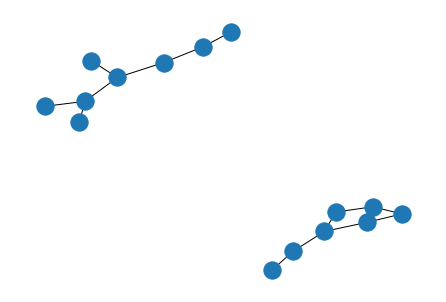

In [122]:
print(nx.number_connected_components(G))
nx.draw(G)

With a disconnected graph G, we should now see the algebraic connectivity is zero (since there are now 2 connected components).

In [123]:
nx.algebraic_connectivity(G)

0.0

We can see that the density is reduced too, because we've removed some edges.

In [124]:
nx.density(G)

0.14285714285714285

Verify by checking the eigenvalues.

In [125]:
L = nx.laplacian_matrix(G).toarray()
evals, evecs = np.linalg.eig(L)

num_zero_evals = sum(np.isclose(evals, 0))

assert num_zero_evals == nx.number_connected_components(G) == 2

Let's introduce a single connection between the two components.

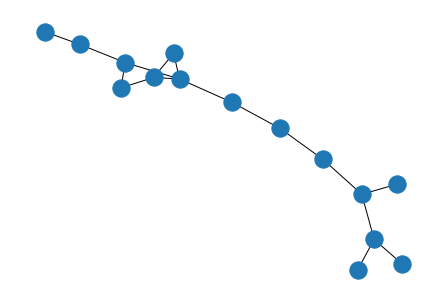

In [126]:
G.add_edge(5, 10)
nx.draw(G)

The edge we have just introduced forms a **bridge** in the graph. This is a bridge because if we removed this edge between the nodes, we would increase the number of connected components by one.

We can look at the **bridges** in the graph using `nx.bridges(G)`.

In [127]:
bridges = list(nx.bridges(G))
print(bridges)

[(0, 4), (0, 7), (1, 2), (2, 3), (2, 7), (4, 5), (5, 10), (6, 7), (8, 9), (8, 12)]


Let's verify that, if we remove the edge involved in a bridge, then the number of connected components increases by one.

In [128]:
G2 = G.copy()
G2.remove_edge(*bridges[0])

Drawing the graph shows that it now has 2 connected components.

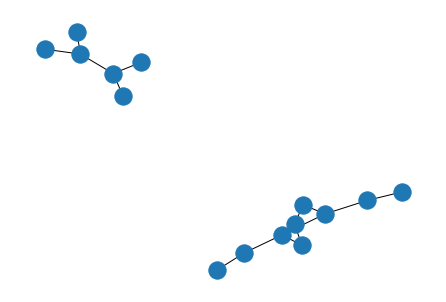

In [129]:
nx.draw(G2)

If we now remove a second bridge, we should see that this creates another connected component.

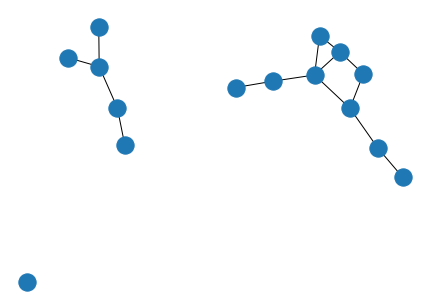

In [130]:
G2.remove_edge(*next(nx.bridges(G2)))
nx.draw(G2)

### Dense Graphs

Let's introduce a highly connected random graph - one that is not far off a **complete graph** (which would have every node connected by an edge to every other node).

Using the `nx.erdos_renyi_graph()` generator, we specify a probability of 0.9 that a connection/edge will exist between any pair of nodes in the graph.

In [131]:
G = nx.erdos_renyi_graph(n=15, p=.9, seed=50)

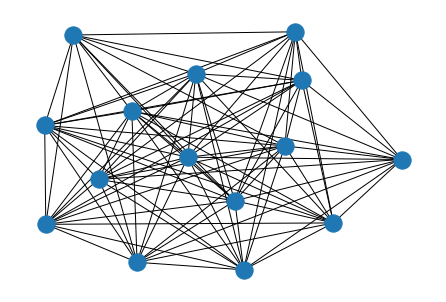

In [132]:
nx.draw(G)

Because there are many more connected pairs of nodes, the density of this graph is also much higher.

In [133]:
nx.density(G)

0.8761904761904762

We can also see higher values in the graph Laplacian's eigenspectrum.

In [134]:
evals, evecs = np.linalg.eig(nx.laplacian_matrix(G).toarray())

sorted(evals)

[-1.7763568394002505e-15,
 9.64899992642034,
 10.611248525939256,
 11.641082355198249,
 11.88217874114585,
 12.000000000000027,
 13.000000000000007,
 13.231165518461628,
 13.570528109518076,
 14.24821341037499,
 14.488735966646946,
 14.677847446294683,
 14.999999999999998,
 15.000000000000007,
 15.000000000000034]

We should also find that, because this graph is very dense, we don't have as many bridges.

In [135]:
list(nx.bridges(G))

[]

As we can see, there are actually no bridges in this graph. Thus, there is no edge that we can remove that would disconnect this graph.

### Addendum: Cliques

A clique in a graph is a set of vertices/nodes where each node is connected to all other nodes in the set. For example, if nodes [1,2,3] are involved in clique, then:

- node1 is connected to node2 and node3
- node2 is connected to node1 and node3
- node3 is connected to node1 and node2.

A clique is a **complete subgraph** of the graph G.

We can find cliques in networkx using the `nx.find_cliques(G)` function.

In [136]:
cliques = list(nx.find_cliques(G))
maximal_clique = max(cliques)  # get clique of maximum length
print(maximal_clique)

[4, 7, 9, 10, 13, 5, 8, 14]


We can create an induced subgraph consisting of just the nodes involved in the clique.

The `G.subgraph(nodelist)` function creates a subgraph consisting of the nodes passed in.

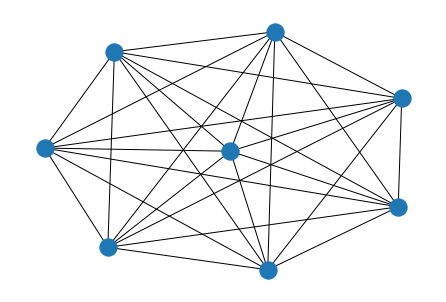

In [137]:
subgraph = G.subgraph(maximal_clique)
nx.draw(subgraph)

We can see, as per the definition of a clique, that this is a **complete graph** - each node is connected to all other nodes.

A related fact - the graph density of the clique will be equal to 1.

In [138]:
nx.density(subgraph)

1.0